# C10H12 (pi system)

[([0, 1], [2, 3]), ([0, 1], [4, 5]), ([0, 1], [6, 7]), ([0, 1], [8, 9]), ([0, 1], [10, 11]), ([0, 1], [12, 13]), ([0, 1], [14, 15]), ([0, 1], [16, 17]), ([0, 1], [18, 19]), ([2, 3], [4, 5]), ([2, 3], [6, 7]), ([2, 3], [8, 9]), ([2, 3], [10, 11]), ([2, 3], [12, 13]), ([2, 3], [14, 15]), ([2, 3], [16, 17]), ([2, 3], [18, 19]), ([4, 5], [6, 7]), ([4, 5], [8, 9]), ([4, 5], [10, 11]), ([4, 5], [12, 13]), ([4, 5], [14, 15]), ([4, 5], [16, 17]), ([4, 5], [18, 19]), ([6, 7], [8, 9]), ([6, 7], [10, 11]), ([6, 7], [12, 13]), ([6, 7], [14, 15]), ([6, 7], [16, 17]), ([6, 7], [18, 19]), ([8, 9], [10, 11]), ([8, 9], [12, 13]), ([8, 9], [14, 15]), ([8, 9], [16, 17]), ([8, 9], [18, 19]), ([10, 11], [12, 13]), ([10, 11], [14, 15]), ([10, 11], [16, 17]), ([10, 11], [18, 19]), ([12, 13], [14, 15]), ([12, 13], [16, 17]), ([12, 13], [18, 19]), ([14, 15], [16, 17]), ([14, 15], [18, 19]), ([16, 17], [18, 19])]
[2.495557128493176, 0.000696961769740323, 0.014243323048559908, 5.701233767752001e-05, 0.0008210794

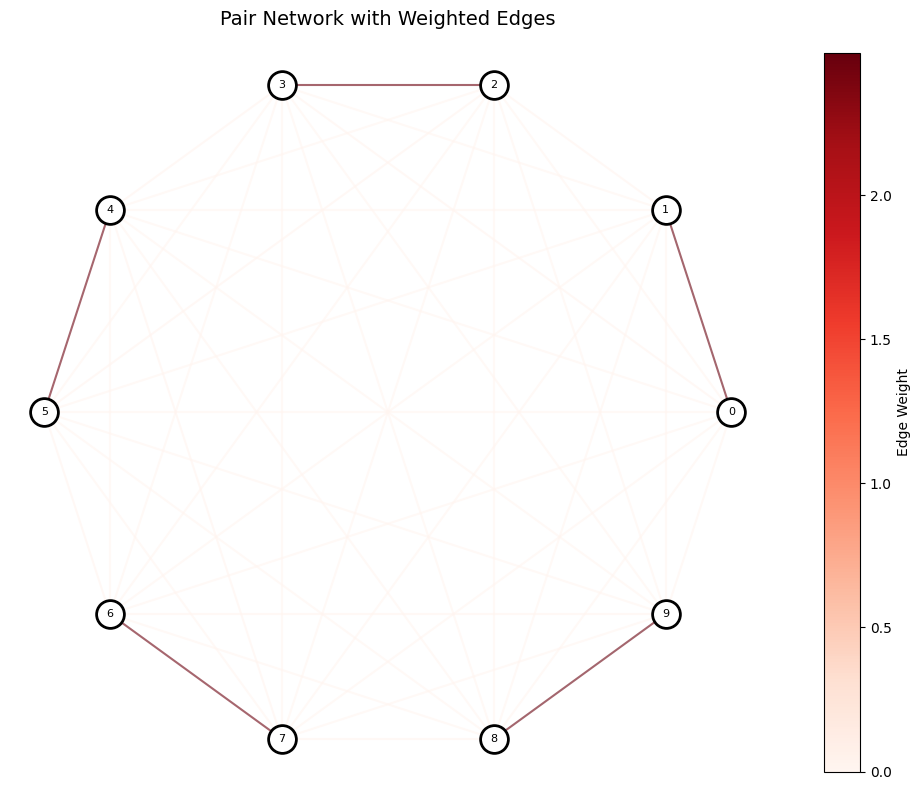

In [18]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

def generate_pairs():
    segments = [[i, i+1] for i in range(0, 19, 2)]
    return [(segments[i], segments[j]) for i in range(len(segments)) for j in range(i + 1, len(segments))]

def plot_pairs_with_weights(pairs, weights):
    # Get all unique segments (nodes)
    nodes = [[i, i+1] for i in range(0, 19, 2)]
    # node_labels = {tuple(node): str(i) for i, node in enumerate(nodes)}
    node_labels = {tuple(node): str(i) for i, node in enumerate(nodes)}
    
    # Create positions for nodes in a circle
    n = len(nodes)
    angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
    pos = {tuple(nodes[i]): (np.cos(angles[i]), np.sin(angles[i])) for i in range(n)}
    
    # Normalize weights for color mapping
    max_weight = max(weights)
    norm = mcolors.Normalize(vmin=0, vmax=max_weight)
    cmap = plt.cm.Reds
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Draw edges with colors based on weights
    for (seg1, seg2), weight in zip(pairs, weights):
        color = cmap(norm(weight))
        p1 = pos[tuple(seg1)]
        p2 = pos[tuple(seg2)]
        ax.plot([p1[0], p2[0]], [p1[1], p2[1]], color=color, linewidth=1.5, alpha=0.6)
    
    # Draw nodes
    for node in nodes:
        p = pos[tuple(node)]
        ax.plot(p[0], p[1], 'o', color='white', markersize=20, markeredgecolor='black', markeredgewidth=2)
        ax.text(p[0], p[1], node_labels[tuple(node)], ha='center', va='center', fontsize=8)
    
    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ax=ax, label='Edge Weight')
    
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title('Pair Network with Weighted Edges', fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()

# Example usage:
if __name__ == "__main__":
    pairs = generate_pairs()
    print(pairs)
    # Generate random weights for demonstration
    # rnd_weights = np.random.rand(len(pairs)) * 100
    weights = [
        2.495557128493176, 0.000696961769740323, 0.014243323048559908, 5.701233767752001e-05, 0.0008210794619030182, 1.4599131050285763e-05, 9.594905150267508e-05, 3.3156810559376027e-06, 1.4999528278547558e-05,
        0.014731047730134339, 0.0007296665159142179, 0.0008683019341115816, 6.17436709049457e-05, 0.00010148299484491474, 1.580036716353206e-05, 1.500839935575371e-05, 3.768035475193443e-06,
        2.467667152969747, 0.000731034711346723, 0.014754764794171482, 5.11648581502655e-05, 0.0008593434947399281, 1.4741370264470532e-05, 0.00010242191822085189,
        0.014796509102337652, 0.0007308189171983948, 0.0008587927726857458, 5.227055709955408e-05, 9.681092770907895e-05, 1.59946809965561e-05,
        2.4667957059955734, 0.0007298850437256199, 0.01477768387649947, 5.73526010949621e-05, 0.0008755117265546453,
        0.014736981697708984, 0.0007296945906558605, 0.0008280162265408286, 6.256203651222592e-05,
        2.4676577214341453, 0.0006994200746612833, 0.014870797920560452,
        0.014377866664008643, 0.0007358320946742047,
        2.49090998606744
    ]
    # import math
    # weights = [math.log(w) for w in weights]
    weights.extend([0] * (len(pairs) - len(weights)))
    print(weights)
    
    # print(f"Generated {len(pairs)} pairs with weights")
    # print(f"Weight range: {min(weights):.2f} to {max(weights):.2f}")
    
    plot_pairs_with_weights(pairs, weights)

Number of pairs: 45
Weight range: 3.32e-06 to 2.495557
Example: 0.01424 vs 5.7e-05
  Linear: would look almost identical
  Log: -4.25 vs -9.77 - clear difference!


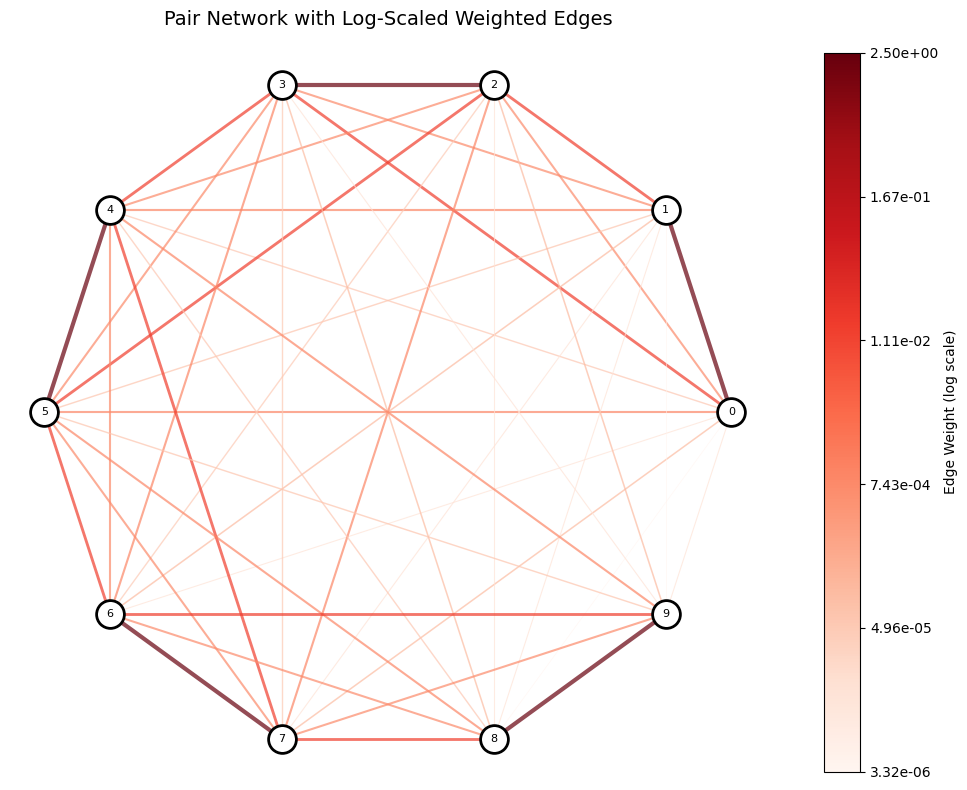

In [19]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

def generate_pairs():
    segments = [[i, i+1] for i in range(0, 19, 2)]
    return [(segments[i], segments[j]) for i in range(len(segments)) for j in range(i + 1, len(segments))]

def plot_pairs_with_weights(pairs, weights):
    # Get all unique segments (nodes)
    nodes = [[i, i+1] for i in range(0, 19, 2)]
    node_labels = {tuple(node): str(i) for i, node in enumerate(nodes)}
    
    # Create positions for nodes in a circle
    n = len(nodes)
    angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
    pos = {tuple(nodes[i]): (np.cos(angles[i]), np.sin(angles[i])) for i in range(n)}
    
    # Apply log transformation to weights for better visualization
    # Filter out zero weights and apply log
    log_weights = []
    for w in weights:
        if w > 0:
            log_weights.append(np.log(w))
        else:
            log_weights.append(np.log(1e-10))  # Small value for zeros
    
    # Normalize log-transformed weights for color mapping
    min_log = min(log_weights)
    max_log = max(log_weights)
    norm = mcolors.Normalize(vmin=min_log, vmax=max_log)
    cmap = plt.cm.Reds
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Draw edges with colors based on log-scaled weights
    for (seg1, seg2), weight, log_weight in zip(pairs, weights, log_weights):
        color = cmap(norm(log_weight))
        p1 = pos[tuple(seg1)]
        p2 = pos[tuple(seg2)]
        # Also vary linewidth slightly based on weight
        linewidth = 0.5 + 2.5 * (log_weight - min_log) / (max_log - min_log)
        ax.plot([p1[0], p2[0]], [p1[1], p2[1]], color=color, linewidth=linewidth, alpha=0.7)
    
    # Draw nodes
    for node in nodes:
        p = pos[tuple(node)]
        ax.plot(p[0], p[1], 'o', color='white', markersize=20, markeredgecolor='black', markeredgewidth=2)
        ax.text(p[0], p[1], node_labels[tuple(node)], ha='center', va='center', fontsize=8)
    
    # Add colorbar with log scale
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, label='Edge Weight (log scale)')
    
    # Add actual weight values to colorbar ticks
    log_ticks = np.linspace(min_log, max_log, 6)
    cbar.set_ticks(log_ticks)
    cbar.set_ticklabels([f'{np.exp(t):.2e}' for t in log_ticks])
    
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title('Pair Network with Log-Scaled Weighted Edges', fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()

# Example usage:
if __name__ == "__main__":
    pairs = generate_pairs()
    print(f"Number of pairs: {len(pairs)}")
    
    weights = [
        2.495557128493176, 0.000696961769740323, 0.014243323048559908, 5.701233767752001e-05, 0.0008210794619030182, 1.4599131050285763e-05, 9.594905150267508e-05, 3.3156810559376027e-06, 1.4999528278547558e-05,
        0.014731047730134339, 0.0007296665159142179, 0.0008683019341115816, 6.17436709049457e-05, 0.00010148299484491474, 1.580036716353206e-05, 1.500839935575371e-05, 3.768035475193443e-06,
        2.467667152969747, 0.000731034711346723, 0.014754764794171482, 5.11648581502655e-05, 0.0008593434947399281, 1.4741370264470532e-05, 0.00010242191822085189,
        0.014796509102337652, 0.0007308189171983948, 0.0008587927726857458, 5.227055709955408e-05, 9.681092770907895e-05, 1.59946809965561e-05,
        2.4667957059955734, 0.0007298850437256199, 0.01477768387649947, 5.73526010949621e-05, 0.0008755117265546453,
        0.014736981697708984, 0.0007296945906558605, 0.0008280162265408286, 6.256203651222592e-05,
        2.4676577214341453, 0.0006994200746612833, 0.014870797920560452,
        0.014377866664008643, 0.0007358320946742047,
        2.49090998606744
    ]
    
    # Pad with zeros if needed
    weights.extend([1e-10] * (len(pairs) - len(weights)))
    
    print(f"Weight range: {min([w for w in weights if w > 0]):.2e} to {max(weights):.6f}")
    print(f"Example: 0.01424 vs 5.7e-05")
    print(f"  Linear: would look almost identical")
    print(f"  Log: {np.log(0.01424):.2f} vs {np.log(5.7e-05):.2f} - clear difference!")
    
    plot_pairs_with_weights(pairs, weights)

# C2H4 (all orbitals)

[([0, 1], [2, 3]), ([0, 1], [4, 5]), ([0, 1], [6, 7]), ([0, 1], [8, 9]), ([0, 1], [10, 11]), ([0, 1], [12, 13]), ([0, 1], [14, 15]), ([0, 1], [16, 17]), ([0, 1], [18, 19]), ([0, 1], [20, 21]), ([0, 1], [22, 23]), ([2, 3], [4, 5]), ([2, 3], [6, 7]), ([2, 3], [8, 9]), ([2, 3], [10, 11]), ([2, 3], [12, 13]), ([2, 3], [14, 15]), ([2, 3], [16, 17]), ([2, 3], [18, 19]), ([2, 3], [20, 21]), ([2, 3], [22, 23]), ([4, 5], [6, 7]), ([4, 5], [8, 9]), ([4, 5], [10, 11]), ([4, 5], [12, 13]), ([4, 5], [14, 15]), ([4, 5], [16, 17]), ([4, 5], [18, 19]), ([4, 5], [20, 21]), ([4, 5], [22, 23]), ([6, 7], [8, 9]), ([6, 7], [10, 11]), ([6, 7], [12, 13]), ([6, 7], [14, 15]), ([6, 7], [16, 17]), ([6, 7], [18, 19]), ([6, 7], [20, 21]), ([6, 7], [22, 23]), ([8, 9], [10, 11]), ([8, 9], [12, 13]), ([8, 9], [14, 15]), ([8, 9], [16, 17]), ([8, 9], [18, 19]), ([8, 9], [20, 21]), ([8, 9], [22, 23]), ([10, 11], [12, 13]), ([10, 11], [14, 15]), ([10, 11], [16, 17]), ([10, 11], [18, 19]), ([10, 11], [20, 21]), ([10, 11]

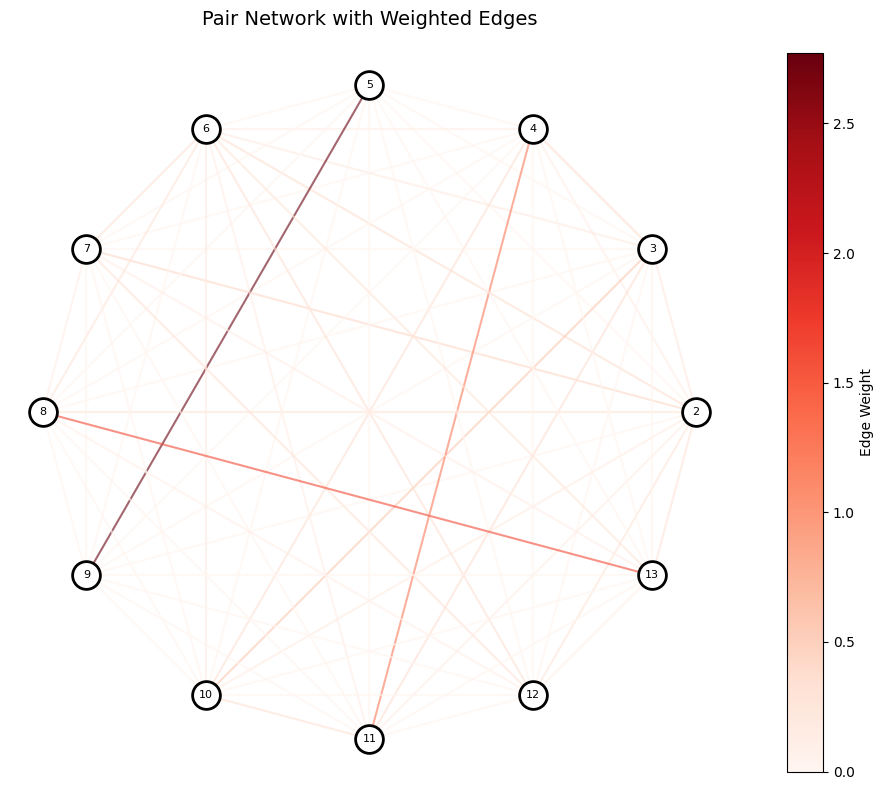

In [4]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

def generate_pairs():
    segments = [[i, i+1] for i in range(0, 23, 2)]
    return [(segments[i], segments[j]) for i in range(len(segments)) for j in range(i + 1, len(segments))]

def plot_pairs_with_weights(pairs, weights):
    # Get all unique segments (nodes)
    nodes = [[i, i+1] for i in range(0, 23, 2)]
    # node_labels = {tuple(node): str(i) for i, node in enumerate(nodes)}
    node_labels = {tuple(node): str(i+2) for i, node in enumerate(nodes)}
    
    # Create positions for nodes in a circle
    n = len(nodes)
    angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
    pos = {tuple(nodes[i]): (np.cos(angles[i]), np.sin(angles[i])) for i in range(n)}
    
    # Normalize weights for color mapping
    max_weight = max(weights)
    norm = mcolors.Normalize(vmin=0, vmax=max_weight)
    cmap = plt.cm.Reds
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Draw edges with colors based on weights
    for (seg1, seg2), weight in zip(pairs, weights):
        color = cmap(norm(weight))
        p1 = pos[tuple(seg1)]
        p2 = pos[tuple(seg2)]
        ax.plot([p1[0], p2[0]], [p1[1], p2[1]], color=color, linewidth=1.5, alpha=0.6)
    
    # Draw nodes
    for node in nodes:
        p = pos[tuple(node)]
        ax.plot(p[0], p[1], 'o', color='white', markersize=20, markeredgecolor='black', markeredgewidth=2)
        ax.text(p[0], p[1], node_labels[tuple(node)], ha='center', va='center', fontsize=8)
    
    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ax=ax, label='Edge Weight')
    
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title('Pair Network with Weighted Edges', fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()

# Example usage:
if __name__ == "__main__":
    pairs = generate_pairs()
    print(pairs)
    # Generate random weights for demonstration
    # rnd_weights = np.random.rand(len(pairs)) * 100
    weights = [
        0.20978454574021077, 0.1219435842896055, 5.626757282328754e-09, 0.3622719697833565, 0.4149984317934865,
        0.27967532001706186, 1.9642756754478796e-08, 0.14561871398950066, 0.12947669923882987, 0.2814087623631192,

        0.2920503120322948, 0.3663023329962374, 3.826990280231257e-09, 0.18036600002540482, 2.068145737998961e-06,
        0.0019294027000520408, 2.1233326208403014e-10, 0.5636327552537905, 0.3507610386733113, 0.014166562671763527,

        0.0031057149390534278, 1.3887104799437111e-09, 0.12598394466091323, 0.002124318554752591, 0.009950611666232234,
        9.550591428819644e-10, 0.3304385147935691, 1.2517140156858688, 0.0010167492367691988, 0.00041271482643701063,

        1.2800187132455676e-08, 6.587896450582775e-09, 3.904113476949078e-09, 2.7725883819134, 4.0700642855995284e-10,
        1.8012737967865178e-09, 6.035190125430745e-10, 8.949792018597691e-10, 0.32942297085530825, 0.27249286774611914,

        1.875129829187472e-09, 0.17869706057469403, 0.12377505867368521, 0.32771475000476147, 0.275262701225532,
        0.1268259379748895, 9.269491840768751e-10, 0.013591331109011229, 0.0012793743258121548, 0.28900612222456523,

        0.1138563537354016, 3.806465365130407e-09, 0.002213512783401317, 0.00014530073721363834, 0.10508116938409673,
        1.6297569907881206, 2.4140693888341502e-09, 1.3094592077322886e-09, 5.747054832028198e-09, 8.349778646277173e-10,
        
        0.32132330838848944, 0.00044516061771049387, 0.003018689356153459, 0.0034401630857308074, 0.007814587052531241,
        0.09550842932892412
    ]
    len(weights)
    print(weights)
    
    # print(f"Generated {len(pairs)} pairs with weights")
    # print(f"Weight range: {min(weights):.2f} to {max(weights):.2f}")
    
    plot_pairs_with_weights(pairs, weights)